# Image Noise Reduction for MNIST Dataset using Autoencoder

### Loading Libraries and Dataset


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape,MaxPooling2D,UpSampling2D,BatchNormalization
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential

In [2]:
#loading MNIST dataset
plt.rcParams['figure.figsize'] = [40, 20]
from sklearn.datasets import load_digits
(X_train, y_train), (X_test, y_test)=mnist.load_data()


In [3]:
print(X_train.shape)
print(X_test.shape)
#printing shape of the images

(60000, 28, 28)
(10000, 28, 28)


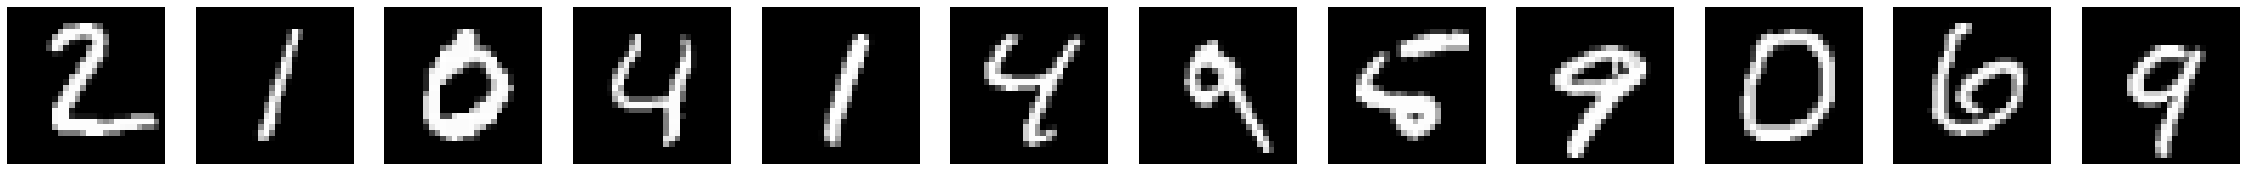

In [4]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.show()

### Preprocessing

In [5]:
#scaling values by 1/255 to bring to range of (0,1]
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255.

### Introducing Noise

In [6]:
noise_ratio=0.5
#defining noise ratio for dataset

In [7]:
X_train_noisy= X_train + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_train.shape)
X_test_noisy= X_test + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_test.shape)
#adding noise to data

In [8]:
X_train_noisy=np.clip(X_train_noisy, 0., 1.)
X_test_noisy=np.clip(X_test_noisy, 0., 1.)
#clipping the pixel values between 0 and 1

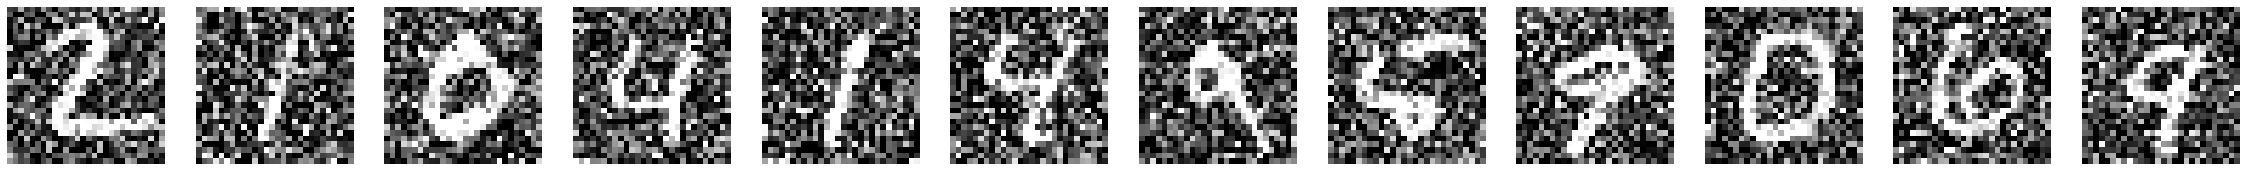

In [9]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test_noisy[i].reshape(28,28), cmap='gray')
plt.show()

### Model Training

In [10]:
model = Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
#using a multilayer perceptron model rather than CNN due to less number of pixels

In [11]:
model.compile(optimizer='adam', loss='mse')
#compiling the model

In [12]:
mnist_digits_training=model.fit(X_train_noisy, X_train,  epochs=20, batch_size=50)
#training the model

Epoch 1/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0330
Epoch 2/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0193
Epoch 3/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0163
Epoch 4/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0146
Epoch 5/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0135
Epoch 6/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0128
Epoch 7/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0122
Epoch 8/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0117
Epoch 9/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0113
Epoch 10/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0110
Epoch 11/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0108
Epoch 12/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0105
E

### Perform Predictions

In [13]:
#plotting the original, noisy and reconstructed images
predictions = model.predict(X_test_noisy)

#### Plotting MSE vs Epochs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


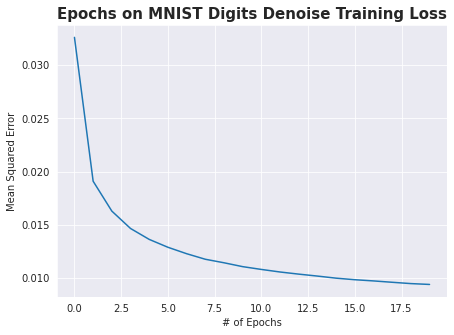

In [ ]:
#plotting the training loss over epochs
fig=plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(mnist_digits_training.epoch, mnist_digits_training.history['loss'])
plt.title('Epochs on MNIST Digits Denoise Training Loss', weight='bold', fontsize=15)
plt.xlabel('# of Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig("mnist denoise error vs epochs.png", bbox_inches='tight')
plt.show()

#### Verification of Results

Original Data

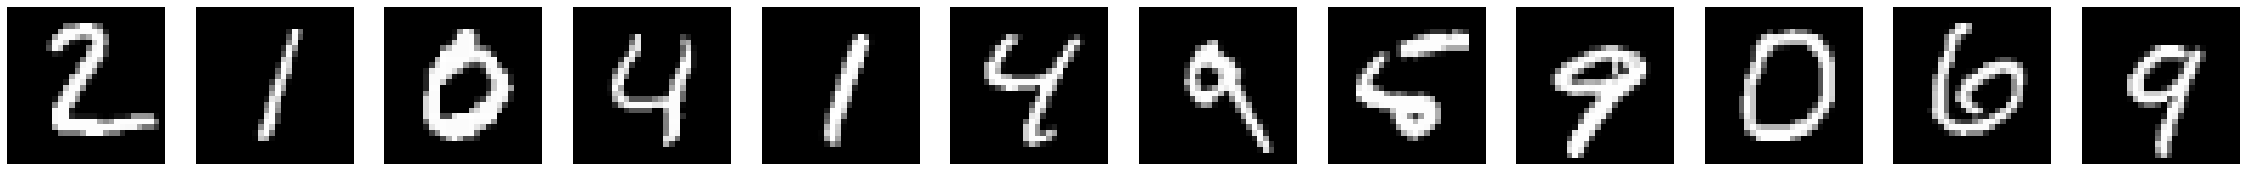

In [14]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.show()

Noisy Data

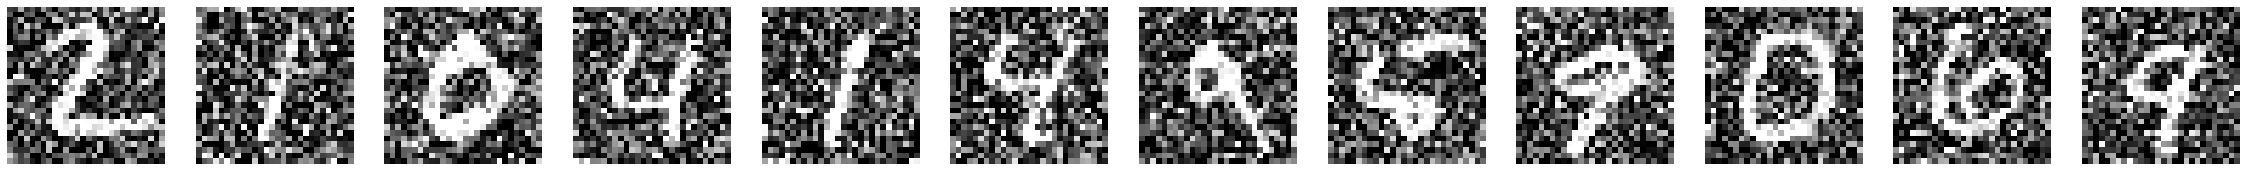

In [15]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test_noisy[i].reshape(28,28), cmap='gray')
plt.show()

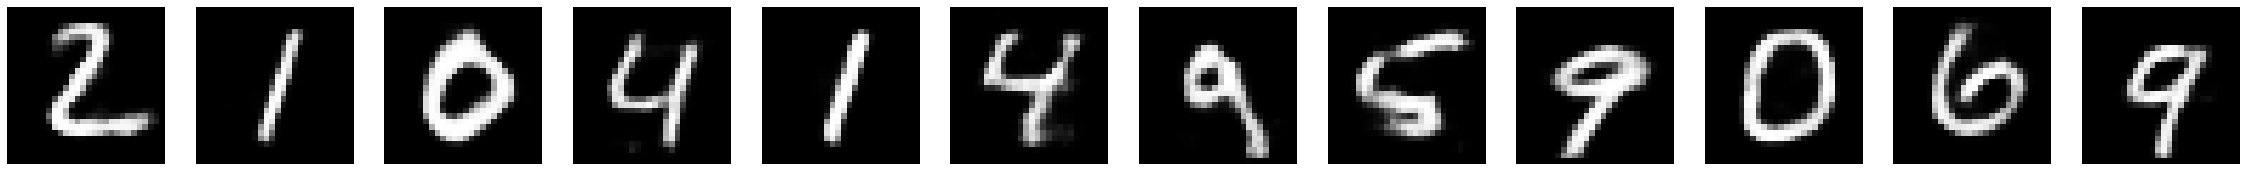

In [16]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(predictions[i].reshape(28,28), cmap='gray')
plt.show()